### Part 1: Facebook Network

In [2]:
library('igraph')
library('Matrix')
library('pracma')


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Attaching package: 'pracma'


The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu




### 1.1 Structural properties of the Facebook network

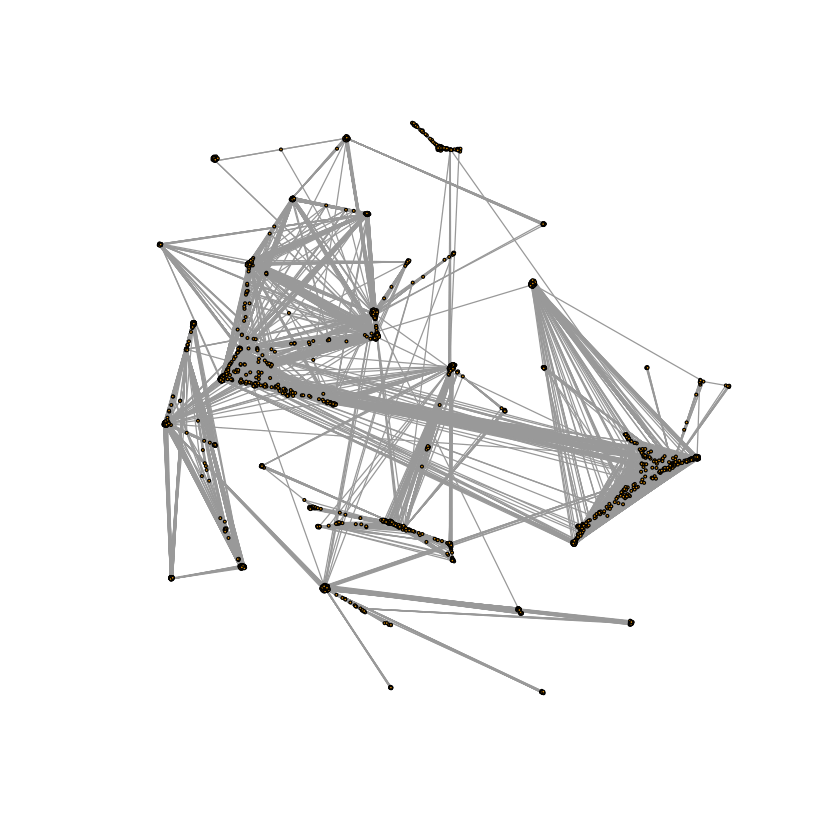

In [3]:
g = read_graph("facebook_combined.txt", format = "edgelist", directed = FALSE)
#g = simplify(g, remove.multiple = TRUE, remove.loops = TRUE)
plot(g, vertex.size=1, vertex.label=NA)

In [4]:
print(paste('Is the network connected?', is.connected(g)))
print(paste('#nodes:', vcount(g)))
print(paste('#edges:', ecount(g)))
print(paste('average degree:', mean(degree(g))))

[1] "Is the network connected? TRUE"
[1] "#nodes: 4039"
[1] "#edges: 88234"
[1] "average degree: 43.6910126268878"


[1] 4039


[1] 8

[1] "diameter: 8"


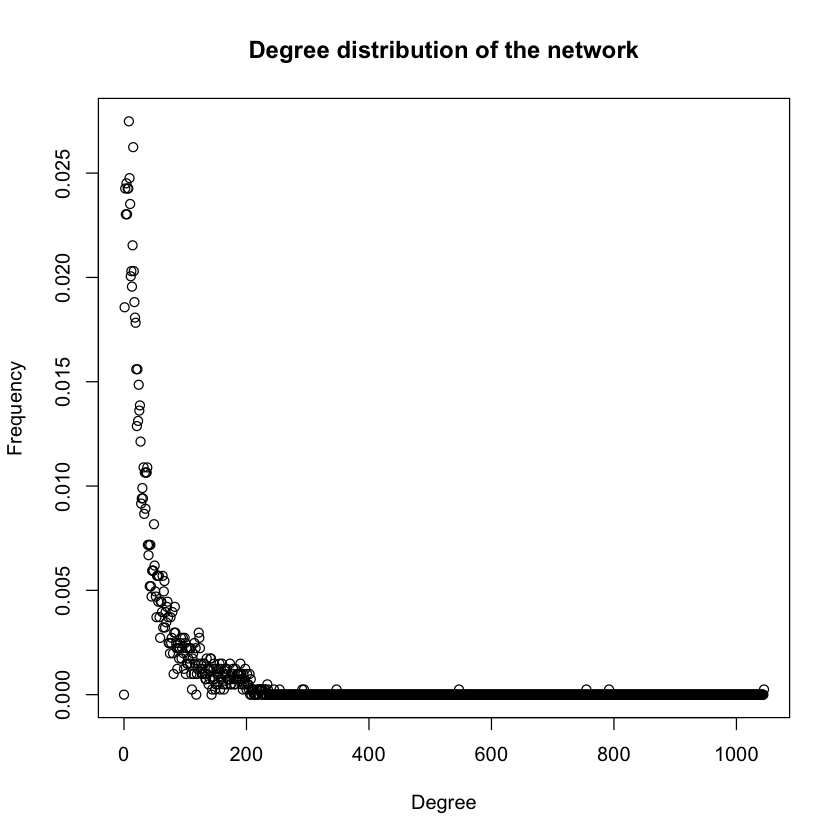

In [5]:
g_components <- clusters(g)
print(g_components$csize)
ix <- which.max(g_components$csize) # like np.argmax(...)
# get the subgraph correspondent to just the giant component
gcc <- induced.subgraph(g, which(g_components$membership == ix))
diameter(gcc)
print(paste('diameter:', diameter(g)))
plot(seq_along(degree.distribution(g)) - 1, degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")

[1] "Slope and intercept:"
(Intercept)    log(deg) 
 -0.6610792  -1.2475263 


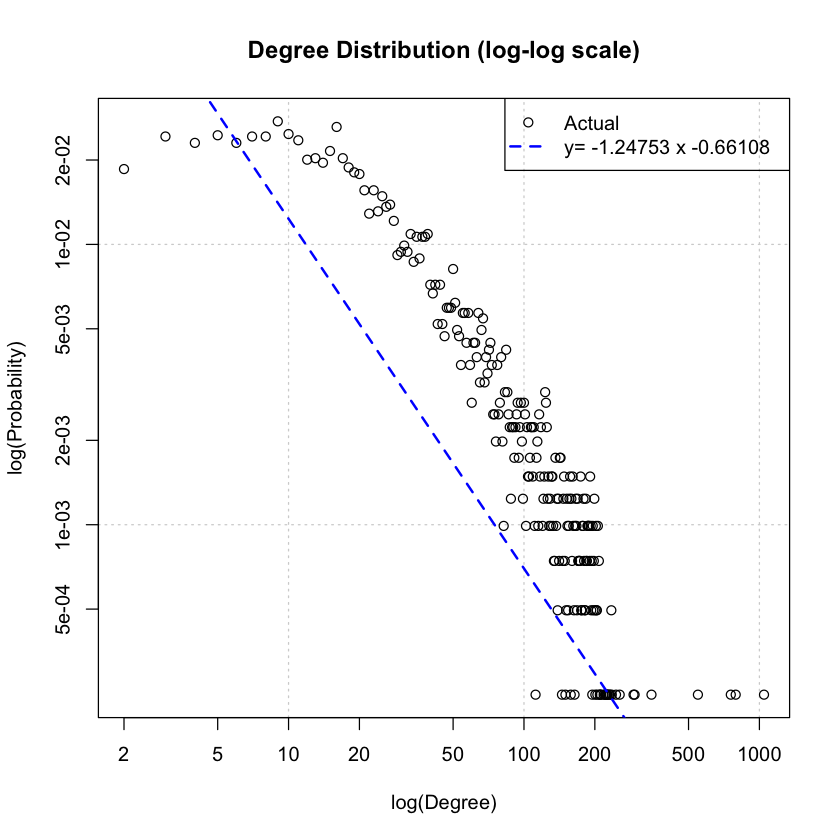

In [9]:
deg_dist = degree.distribution(g)
deg <- c(1:length(deg_dist))[which(deg_dist !=0, arr.ind = TRUE)]
dist <-deg_dist[which(deg_dist !=0, arr.ind = TRUE)]
plot(deg,dist,main="Degree Distribution (log-log scale)",
     xlab="log(Degree)",ylab="log(Probability)",grid(),col="black",log="xy")
abline(lm(log(dist) ~ log(deg)),col="blue",lwd=2,lty=2)
linear_reg = lm(log(dist) ~ log(deg))$coefficients
str = paste('y=',round(linear_reg[2],5), 'x', round(linear_reg[1],5))
legend('topright', legend = c("Actual",str),
       lty = c(NA, 2), lwd = c(1,2), pch=c(1,NA),
       col = c('black','blue'))
print("Slope and intercept:")
print(linear_reg)
#legend('bottomleft', legend = c("Original", "Linear regression"),
#       lty = c(0, 1), lwd = c(1,3), pch=c(1,NA),
#       col = c('black','red'))

### 1.2 Personalized network

In [11]:
personalized_nets = make_ego_graph(g, order = 1, nodes = 1)
length(personalized_nets)
personalized_nets
ego_1 = personalized_nets[[1]]
vcount(ego_1)
ecount(ego_1)

[1] 1

[[1]]
IGRAPH 978b4c3 UN-- 348 2866 -- 
+ attr: name (v/n)
+ edges from 978b4c3 (vertex names):
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--10  4--10
[11]  1--11  1--12  1--13  1--14  1--15  1--16  1--17  1--18  1--19  1--20
[21] 18--20  1--21  3--21 15--21  1--22 10--22 14--22  1--23  8--23  1--24
[31]  1--25  1--26  4--26 10--26 22--26  1--27  4--27 10--27 14--27 22--27
[41] 26--27  1--28  1--29 15--29  1--30 17--30  1--31 10--31  1--32  8--32
[51] 22--32 26--32  1--33  1--34  1--35  1--36  1--37  1--38  1--39  8--39
[61]  1--40 22--40 26--40  1--41 22--41 26--41 27--41 30--41  1--42 15--42
[71] 18--42 20--42 21--42 29--42  1--43 34--43  1--44  1--45 21--45 42--45
+ ... omitted several edges


[1] 348

[1] 2866

In [12]:
diameter(ego_1)

[1] 2

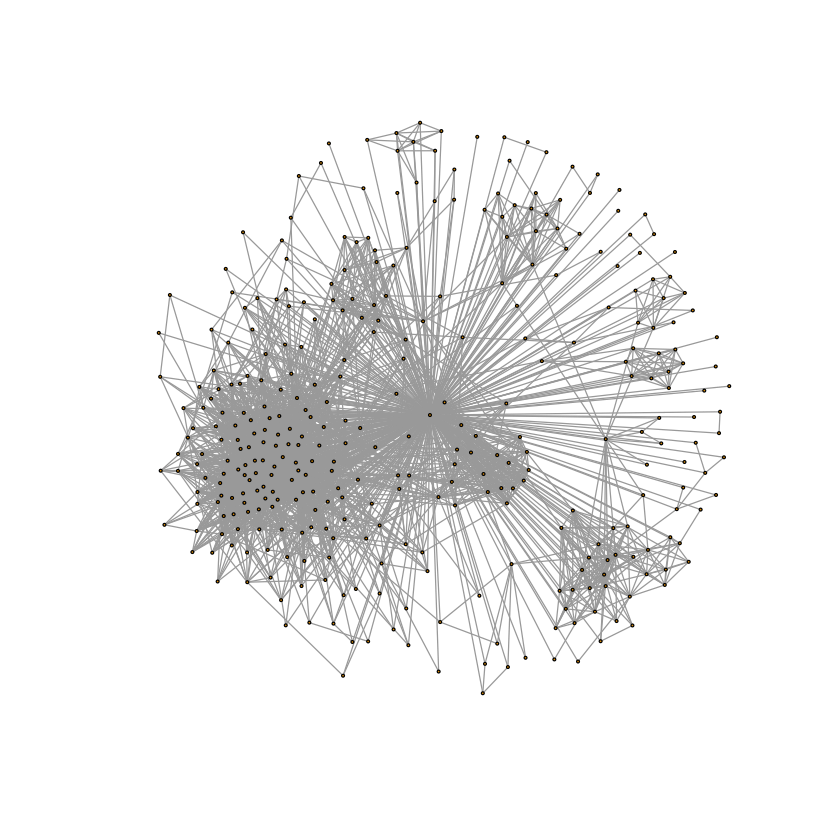

In [13]:
plot(ego_1, vertex.size=1, vertex.label=NA)